In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE

In [2]:
data = pd.read_csv('diabetes_dataset.csv')

In [3]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,59,0,0,never,23.32,3.5,160,0
1,Female,72,0,0,never,29.55,5.8,220,1
2,Female,33,0,0,No Info,27.32,4.8,200,0
3,Female,14,0,0,never,18.06,6.1,145,0
4,Male,73,0,0,never,25.53,7.0,130,1


In [4]:
# EDA

In [5]:
data.shape

(21250, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21250 entries, 0 to 21249
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               21250 non-null  object 
 1   age                  21250 non-null  int64  
 2   hypertension         21250 non-null  int64  
 3   heart_disease        21250 non-null  int64  
 4   smoking_history      21250 non-null  object 
 5   bmi                  21250 non-null  float64
 6   HbA1c_level          21250 non-null  float64
 7   blood_glucose_level  21250 non-null  int64  
 8   diabetes             21250 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 1.5+ MB


In [7]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,21250.000000,21250.000000,21250.000000,21250.000000,21250.000000,21250.000000,21250.000000
mean,48.592988,0.133318,0.076471,28.937483,6.008866,157.296847,0.400000
std,22.040231,0.339926,0.265756,7.268683,1.266622,54.501733,0.489909
min,0.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,32.000000,0.000000,0.000000,25.400000,5.700000,126.000000,0.000000
50%,52.000000,0.000000,0.000000,27.320000,6.100000,155.000000,0.000000
75%,66.000000,0.000000,0.000000,32.000000,6.600000,160.000000,1.000000
max,80.000000,1.000000,1.000000,88.720000,9.000000,300.000000,1.000000


In [8]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

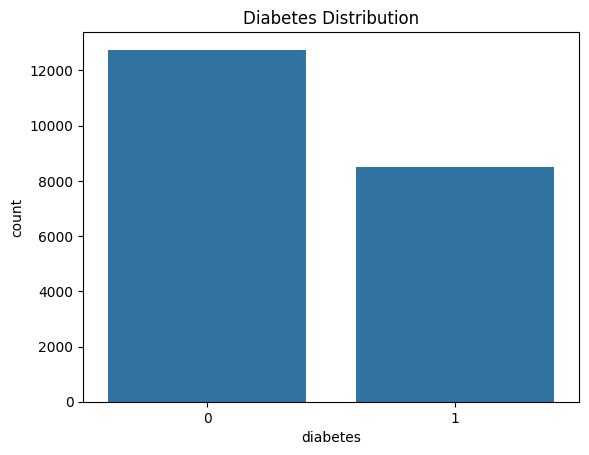

In [9]:
# Target Distribution

sns.countplot(x='diabetes', data=data)
plt.title("Diabetes Distribution")
plt.show()

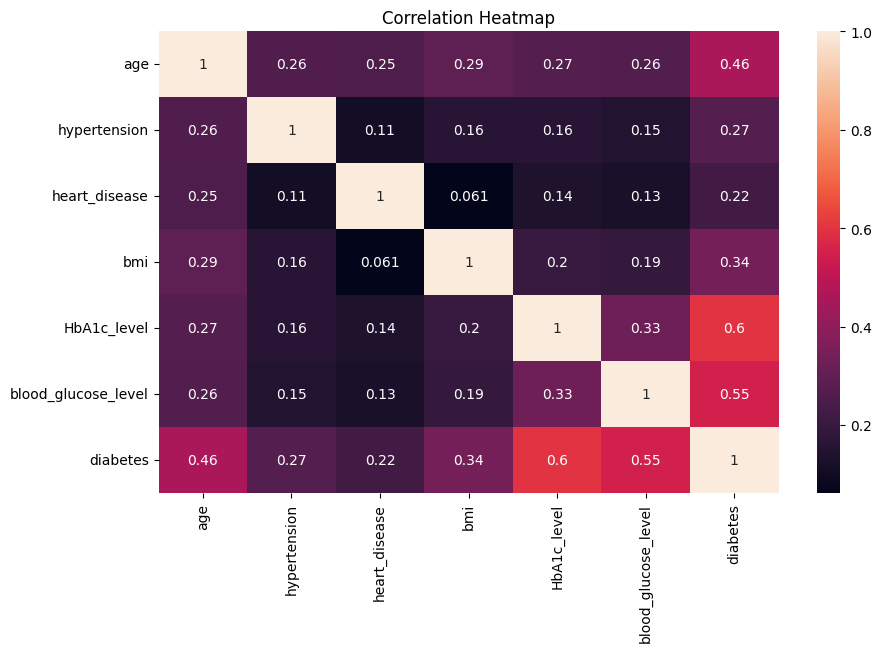

In [13]:
# Correlation Heatmap

plt.figure(figsize=(10,6))

numeric_data = data.select_dtypes(include=['int64', 'float64'])

sns.heatmap(numeric_data.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [14]:
# Outlier Detection 

def checkOutliers(data, column):
    plt.figure(figsize=(30, 5))
    plt.subplot(1, 2, 1)
    plt.boxplot(data[column])
    plt.subplot(1, 2, 2)
    sns.histplot(data=data, x=data[column], kde=True)
    plt.axvline(data[column].mean()+3*data[column].std())
    plt.axvline(data[column].mean()-3*data[column].std())

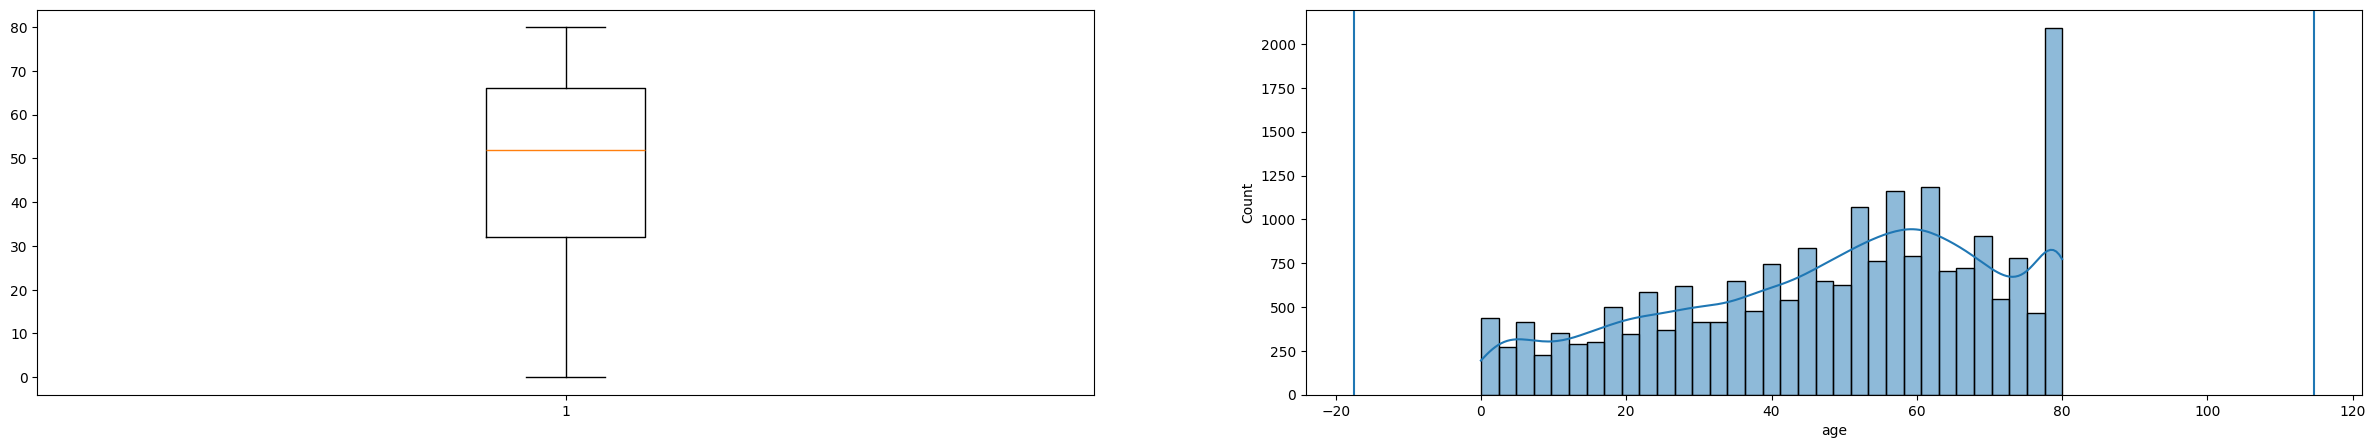

In [15]:
checkOutliers(data, "age")

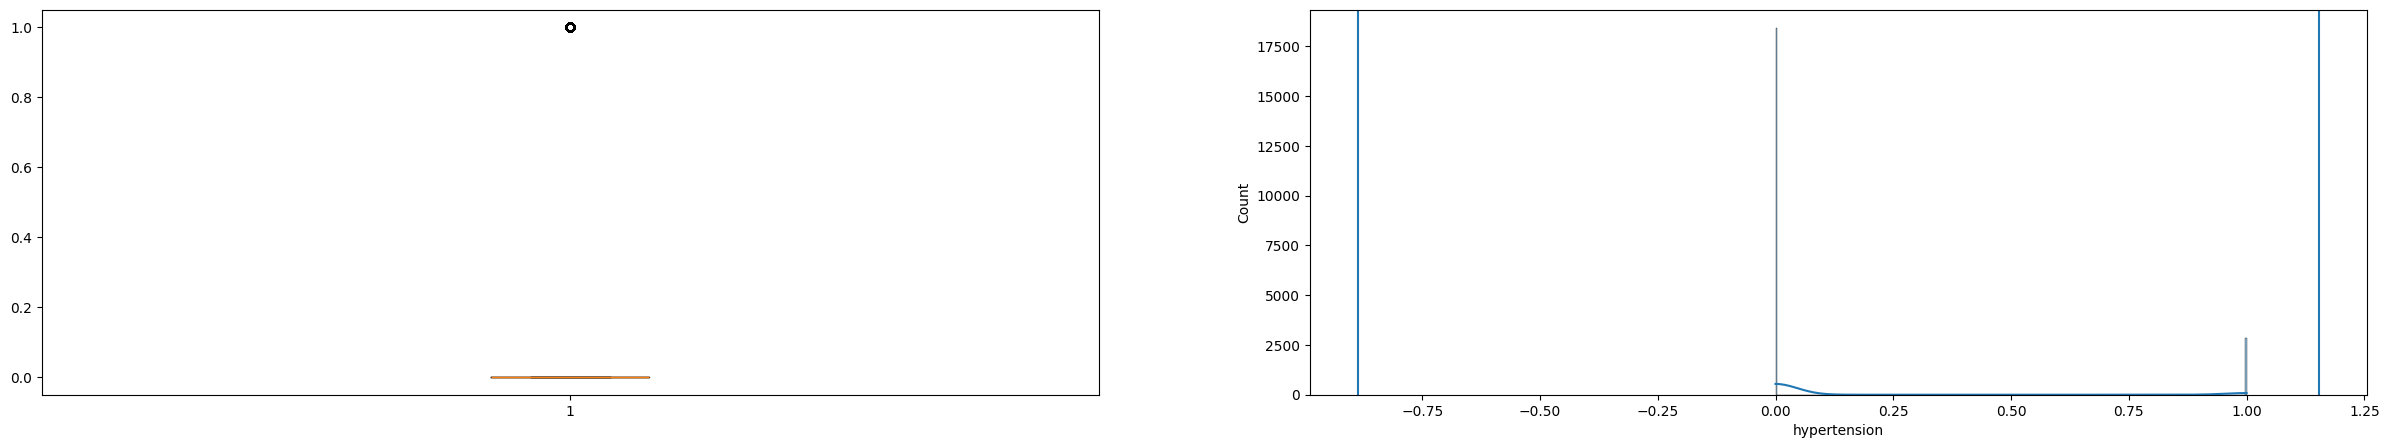

In [16]:
checkOutliers(data, "hypertension")

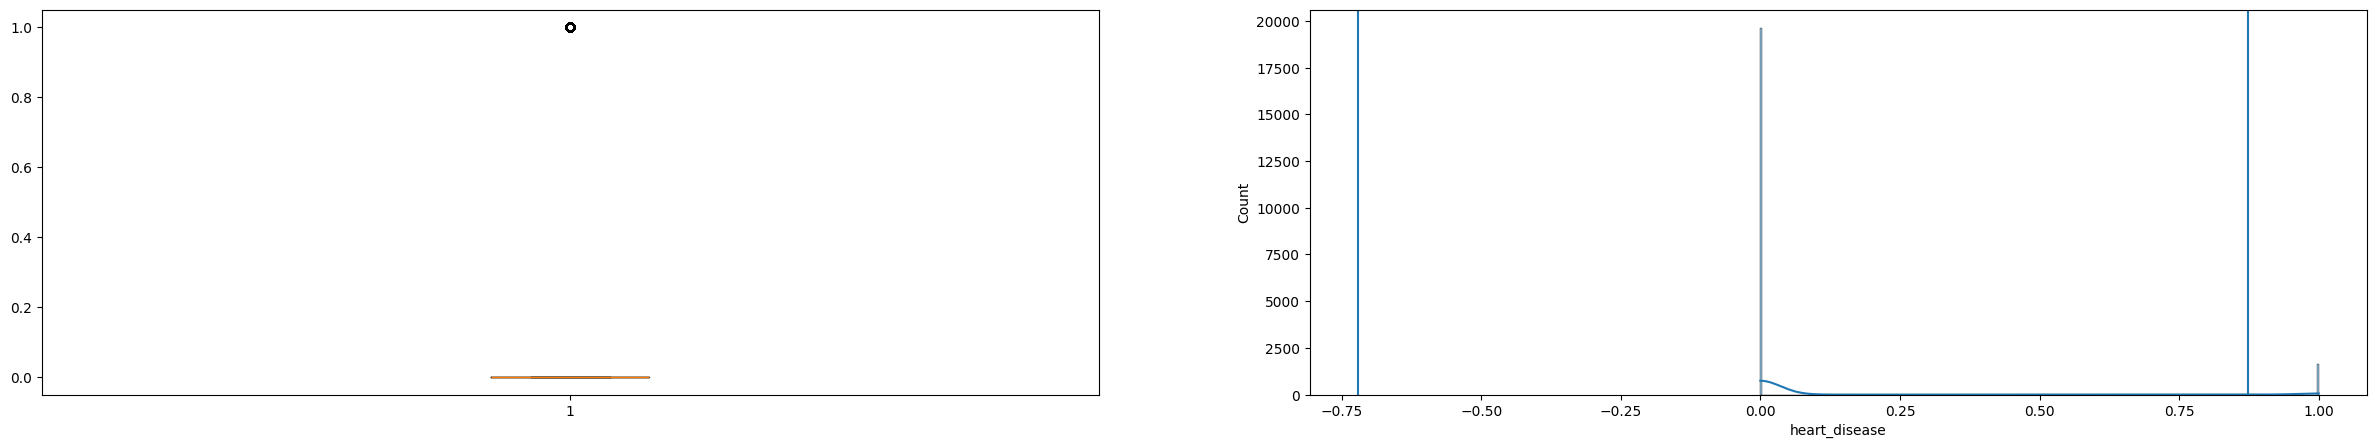

In [17]:
checkOutliers(data, "heart_disease")

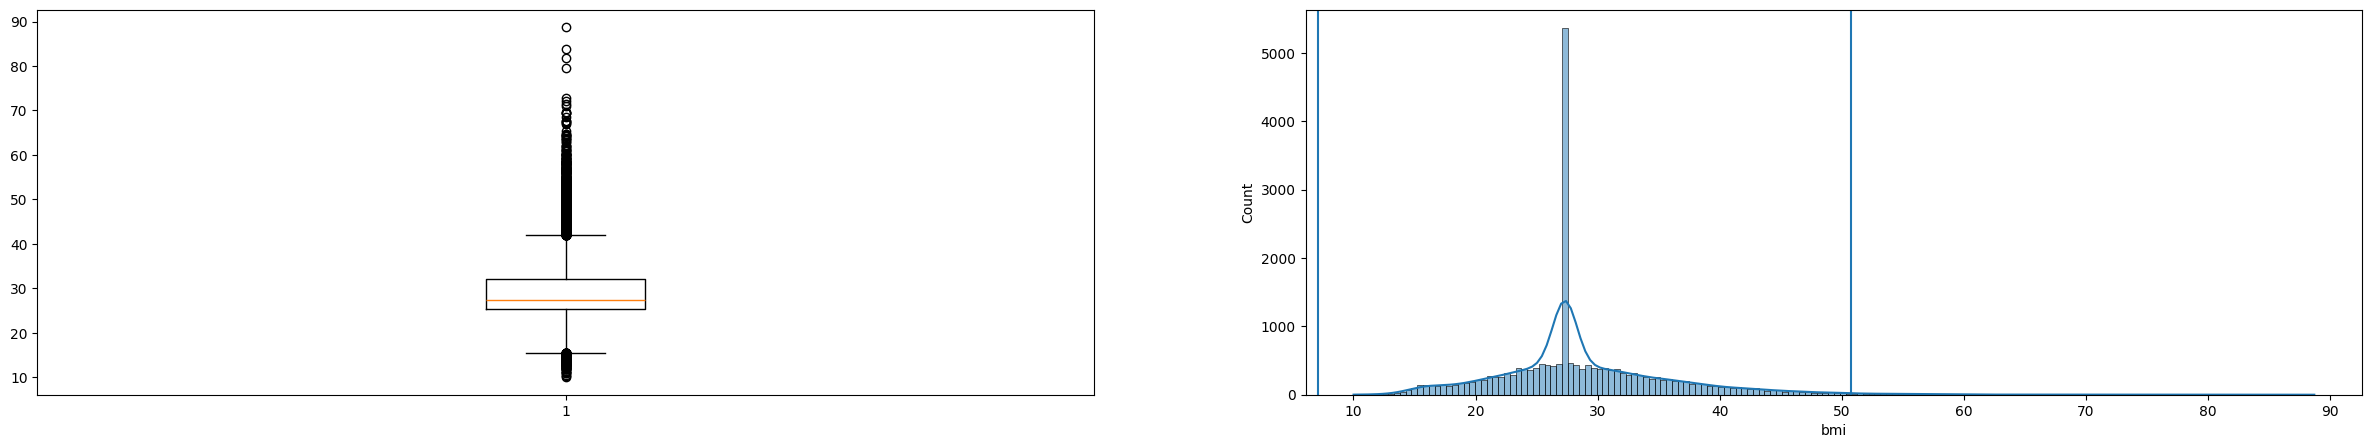

In [18]:
checkOutliers(data, "bmi")

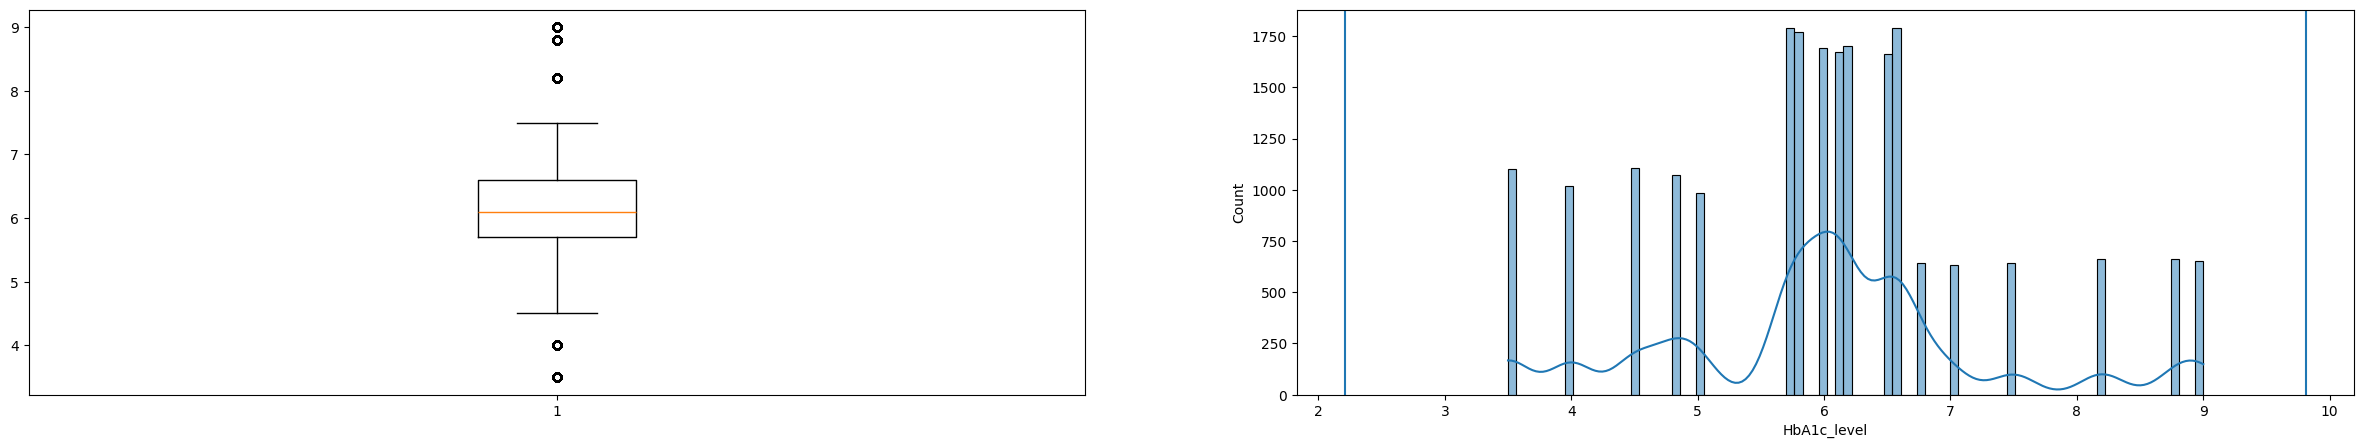

In [19]:
checkOutliers(data, "HbA1c_level")

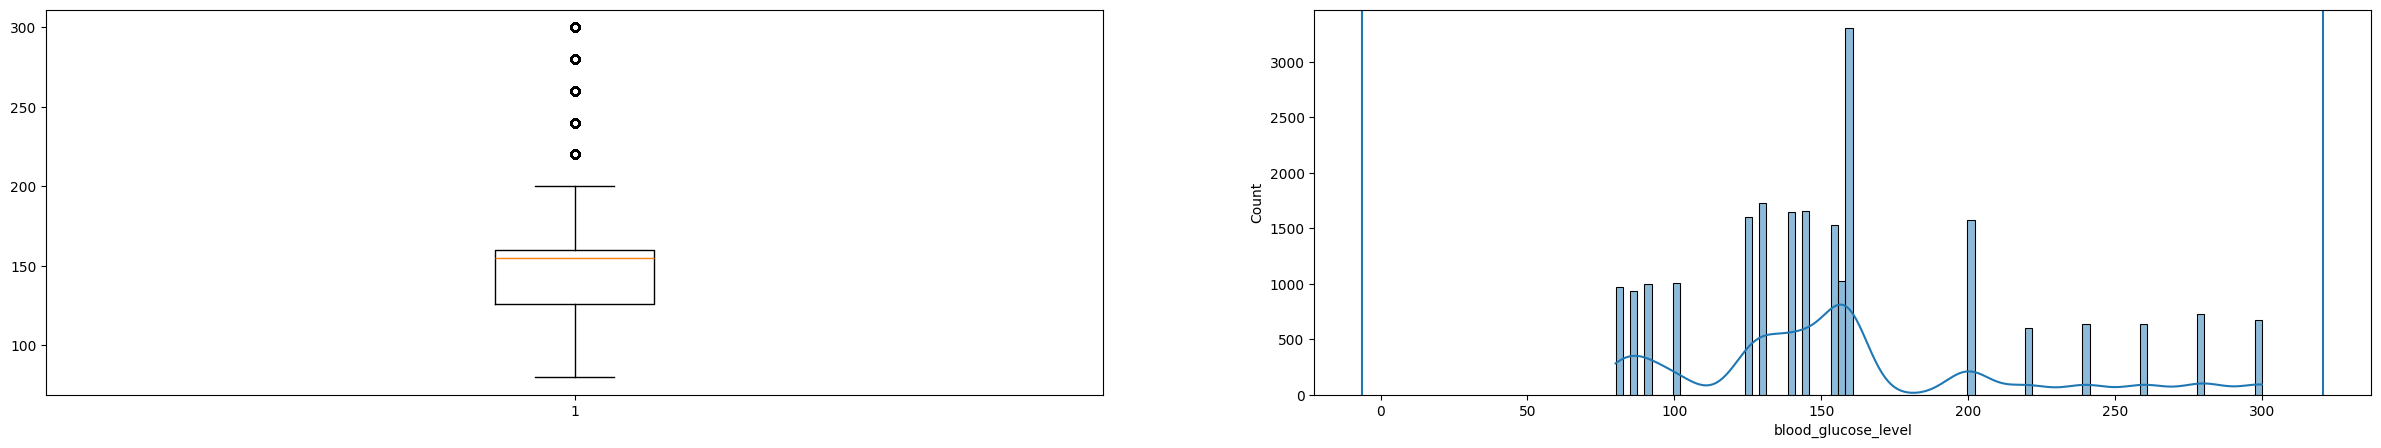

In [20]:
checkOutliers(data, "blood_glucose_level")

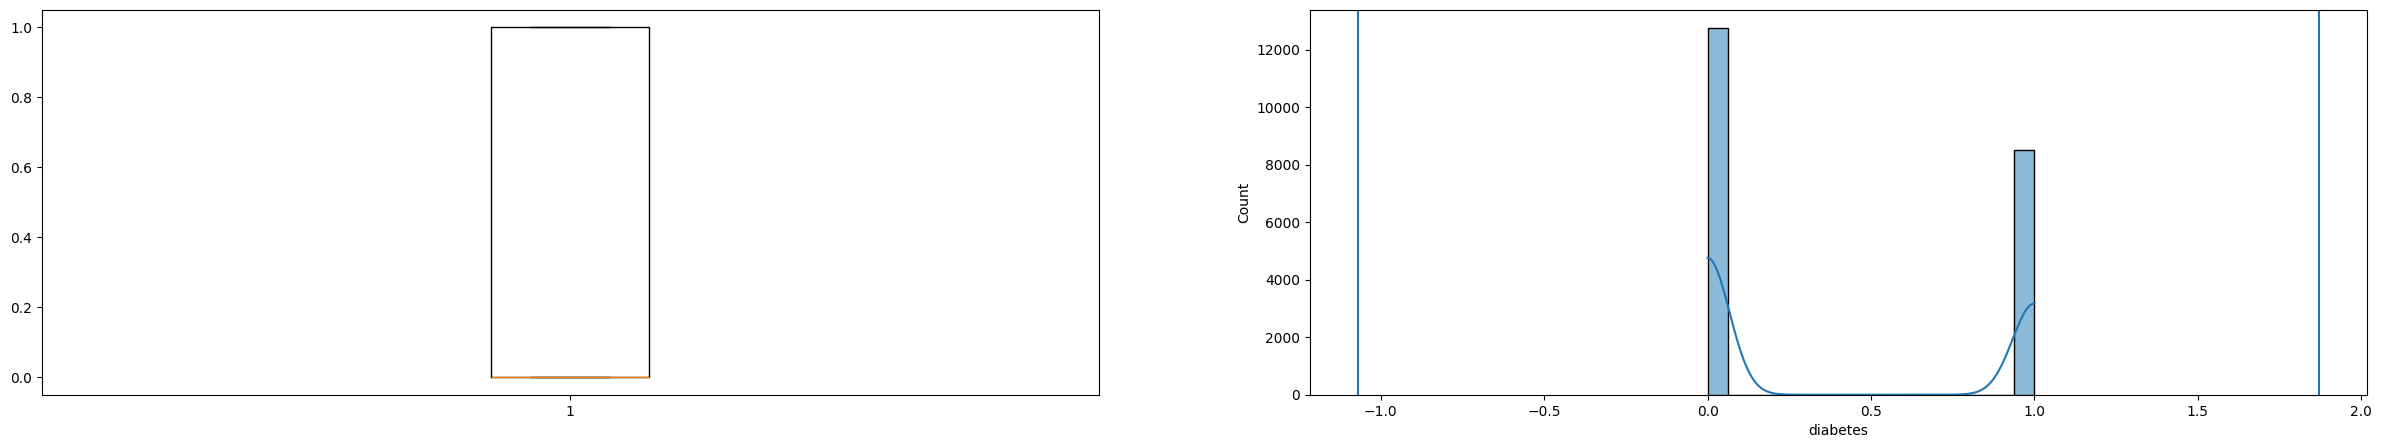

In [21]:
checkOutliers(data, "diabetes")

In [22]:
# Handle Outliers

def handleoutliers(data, column):
  
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
   
    IQR = Q3 - Q1
    
   
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
   
    data.loc[data[column]>upper_limit,column]=upper_limit
    data.loc[data[column]<lower_limit,column]=lower_limit

In [23]:
handleoutliers(data,"age")

In [24]:
handleoutliers(data,"hypertension")

In [25]:
handleoutliers(data,"bmi")

In [26]:
handleoutliers(data, "HbA1c_level")

In [27]:
handleoutliers(data, "blood_glucose_level")

In [28]:
handleoutliers(data, "diabetes")

C:\Users\Ajinkya Suroshe\AppData\Local\Temp\ipykernel_3704\923765406.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[column]>upper_limit,column]=upper_limit


In [29]:
# Encoding Categorical Columns

data['diabetes'] = data['diabetes'].astype(int)

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['gender'] = le.fit_transform(data['gender'])
data['smoking_history'] = le.fit_transform(data['smoking_history'])

In [31]:
# Split Features & Target

In [32]:
X = data.drop("diabetes", axis=1)
y = data["diabetes"]

In [33]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [34]:
# Feature Scaling

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [35]:
# Imbalanced data

data["diabetes"].value_counts()

diabetes
0    12750
1     8500
Name: count, dtype: int64

In [36]:
# Handle Imbalanced data

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [37]:
print("Before SMOTE:")
print(y_train.value_counts())

Before SMOTE:
diabetes
0    8939
1    5936
Name: count, dtype: int64


In [38]:
# Decision Tree

In [53]:
model = DecisionTreeClassifier(
    max_depth=6,            # limit depth
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42
)

model.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",6
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",5
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",3
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

In [54]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, train_pred))
print("Testing Accuracy:", accuracy_score(y_test, test_pred))

Training Accuracy: 0.8942521008403361
Testing Accuracy: 0.899607843137255


In [55]:
# Confusion matrix
print(confusion_matrix(y_test, y_pred))

[[3419  392]
 [ 362 2202]]


In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3811
           1       0.85      0.86      0.85      2564

    accuracy                           0.88      6375
   macro avg       0.88      0.88      0.88      6375
weighted avg       0.88      0.88      0.88      6375



In [58]:
# Cross Validate

from sklearn.model_selection import cross_validate

In [59]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=9)

print("Cross Validation Accuracy:", cv_scores.mean())

Cross Validation Accuracy: 0.8904875914703962


In [60]:
import pickle
with open("diabetes.pkl","wb") as f:
    pickle.dump(model,f)

In [61]:
with open("scaler.pkl","wb") as f:
    pickle.dump(scaler,f)